# Make Animation from pickels files

In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
import platform
from joblib import Parallel, delayed

#Custome graph format style sheet
#plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'

In [2]:
import multiprocessing
from joblib import Parallel, delayed
num_jobs=30

In [3]:
## Task specific imports
import os as os
#import keras.utils as image
import glob
from PIL import Image, ImageDraw
import pickle

In [4]:
import math
import CoreFunctions as cf


## Choosing Platform
Working is beinging conducted on several computers, and author needs to be able to run code on all without rewriting..  This segment of determines which computer is being used, and sets the directories accordingly.

In [5]:
HostName = platform.node()

if HostName == "Server":
    Computer = "Desktop"   
elif HostName[-6:] == 'wm.edu':
    Computer = "SciClone"
elif HostName == "SchoolLaptop":
    Computer = "LinLap"
elif HostName == "WTC-TAB-512":
    Computer = "PortLap"
else:
    Computer = "WinLap"
    
if Computer ==  "SciClone":
    rootfolder = '/sciclone/scr10/dchendrickson01/EFIT/'
    
else:
    asdfasdf

## Load data

In [8]:
fileNames = glob.glob(rootfolder+'*')


In [20]:
fileNames.sort()


In [12]:
os.path.basename(fileNames[10])

'BiggerShTii'

In [26]:
Runs = [['Folder','ForcingFuctionNumber','TimeStepsSimLength','GridDesignFrequency','Flaw','AbsorptionOn','Length',
         'TiesIncluded','InputSignalFrequency','Wheel1Start','ExpectedGoodData','FlawType','TimeStep','GridStep','RunTime',
         'GridLengthNodes','GridWidthNodes','GridHeightNodes']]
for folder in fileNames:
    try:
        fileName = folder+'/Parameters.p'
        file=open(fileName,'rb')
        Parameters=pickle.load(file)
        file.close()
        try: 
            ff= Parameters['ForcingFuctionNumber'] 
        except: 
            ff=''
        try: 
            tsn= Parameters['TimeStepsSimLength'] 
        except: tsn=''
        try: 
            gds=Parameters['GridDesignFrequency'] 
        except: 
            gds=''
        try: 
            f=Parameters['Flaw'] 
        except: 
            f=''
        try: 
            a=Parameters['AbsorptionOn'] 
        except: 
            a=''
        try: 
            l=Parameters['Length'] 
        except: 
            l=''
        try: 
            ti=Parameters['TiesIncluded'] 
        except:
            ti=''
        try: 
            isf=Parameters['InputSignalFrequency'] 
        except: 
            isf=''
        try: 
            w1=Parameters['Wheel1Start'] 
        except: 
            w1=''
        try: 
            gd=Parameters['ExpectedGoodData'] 
        except: 
            gd=''
        try: 
            ft=Parameters['FlawType'] 
        except: 
            ft=''
        try: 
            ts=Parameters['TimeStep'] 
        except: 
            ts=''
        try: 
            gs= Parameters['GridStep'] 
        except: 
            gs=''
        try: 
            rt=Parameters['RunTime'] 
        except: 
            rt=''
        try: 
            gl=Parameters['GridLengthNodes'] 
        except: 
            gl=''
        try: 
            gw=Parameters['GridWidthNodes'] 
        except: 
            gw=''
        try: 
            gh=arameters['GridHeightNodes'] 
        except: 
            gh=''

        Runs.append([os.path.basename(folder),ff,tsn,gds,f,a,l,ti,isf,w1,gd,ft,ts,gs,rt,gl,gw,gh])
    except:
        pass
    #Runs.append([os.path.basename(folder),'Fail'])
    

In [30]:
i=0
for run in Runs:
    if run[4]:
        print(i,run[0],run[1],run[4])
    i+=1

0 Folder ForcingFuctionNumber Flaw
28 FlawRepeat 1 True
29 FlawRepeatRubbing 7 True
31 FlawTest1 3 True
33 FlawTest15a1 3 True
38 TopHitFlawRun 1 True
39 TopHitFlawRunRace2 1 True


## Specific Functions

In [38]:
def getPreStrippedData(fileName):
    file=open(fileName,'rb')
    temp = pickle.load(file)
    file.close()
    
    return temp

## make all the frames of all the cases

In [58]:
IndexToRun = 28

In [59]:
Runs[IndexToRun]

['FlawRepeat',
 1,
 18954,
 74574,
 True,
 False,
 20,
 0,
 16300,
 15.2,
 13605.681870762768,
 7,
 3.3333027951074397e-07,
 0.003522809501754849,
 0.006317942117846641,
 5696,
 45,
 '']

In [32]:
imFolder=rootfolder+Runs[IndexToRun][0]

In [33]:
imFolder

'/sciclone/scr10/dchendrickson01/EFIT/FlawRepeat'

In [40]:
fileNames = glob.glob(imFolder+'/Data*.p')

In [41]:
for i in range(len(fileNames)):
    print(i,fileNames[i].split('-')[1].split('.')[0])

0 EndM4yNS
1 EndM4
2 WebStart
3 HeadEnd
4 TopSurface
5 TopSurfaceZ
6 LeftHead
7 MiddleVerticalPlanex


In [42]:
fileIndex = 0


In [43]:
Data = getPreStrippedData(fileNames[fileIndex])

In [44]:
Data.shape

(45, 45, 19055)

Data = np.nan_to_num(Data, copy=True, nan=0.0, posinf=1.0, neginf=1.0)

In [45]:
xs = 0
xe = Data.shape[0]
ts = 0
te = Data.shape[2]
tt = 1

EMin = np.nanmin(Data[xs:xe,:,ts:te])
EMax = np.nanmax(Data[xs:xe,:,ts:te])

In [46]:
v = np.linspace(EMin, EMax, 30, endpoint=True)[0:20]

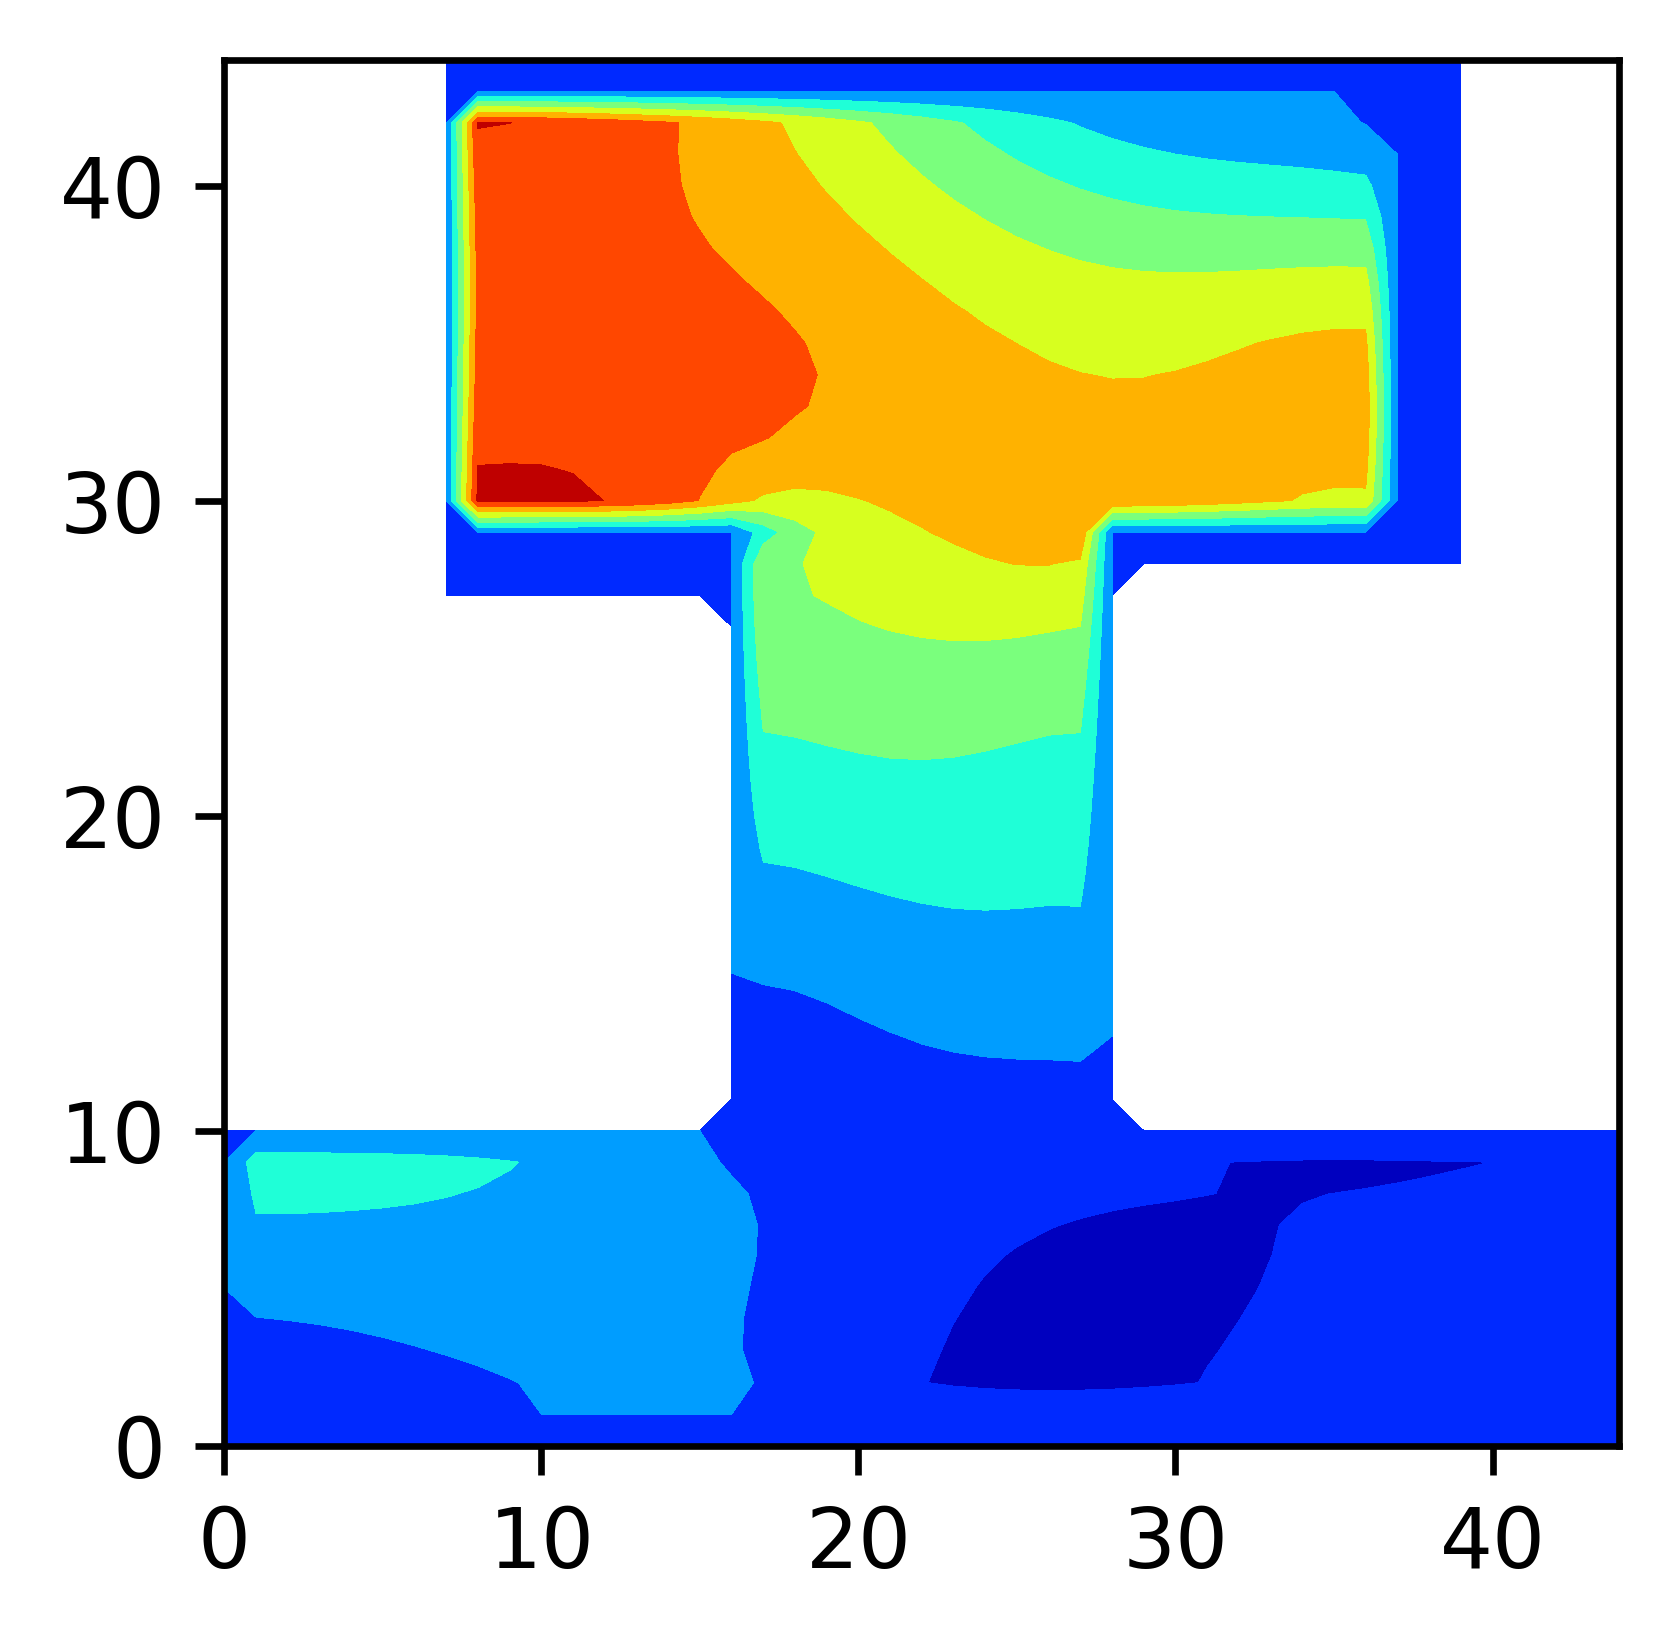

In [47]:
fig = plt.figure(figsize=(3,3), dpi=600)
t = 5000
plt.contourf(Data[:,:,t].T, cmap=plt.cm.jet)
#plt.title('Y Displacement at time step 5000 4 nodes from end')
plt.show()

In [51]:
row = 20

In [49]:
CS = 11
CE = 18

CS=17
CE=27

#CS=8
#CE=36

#CS = 1000
#CE = 5000

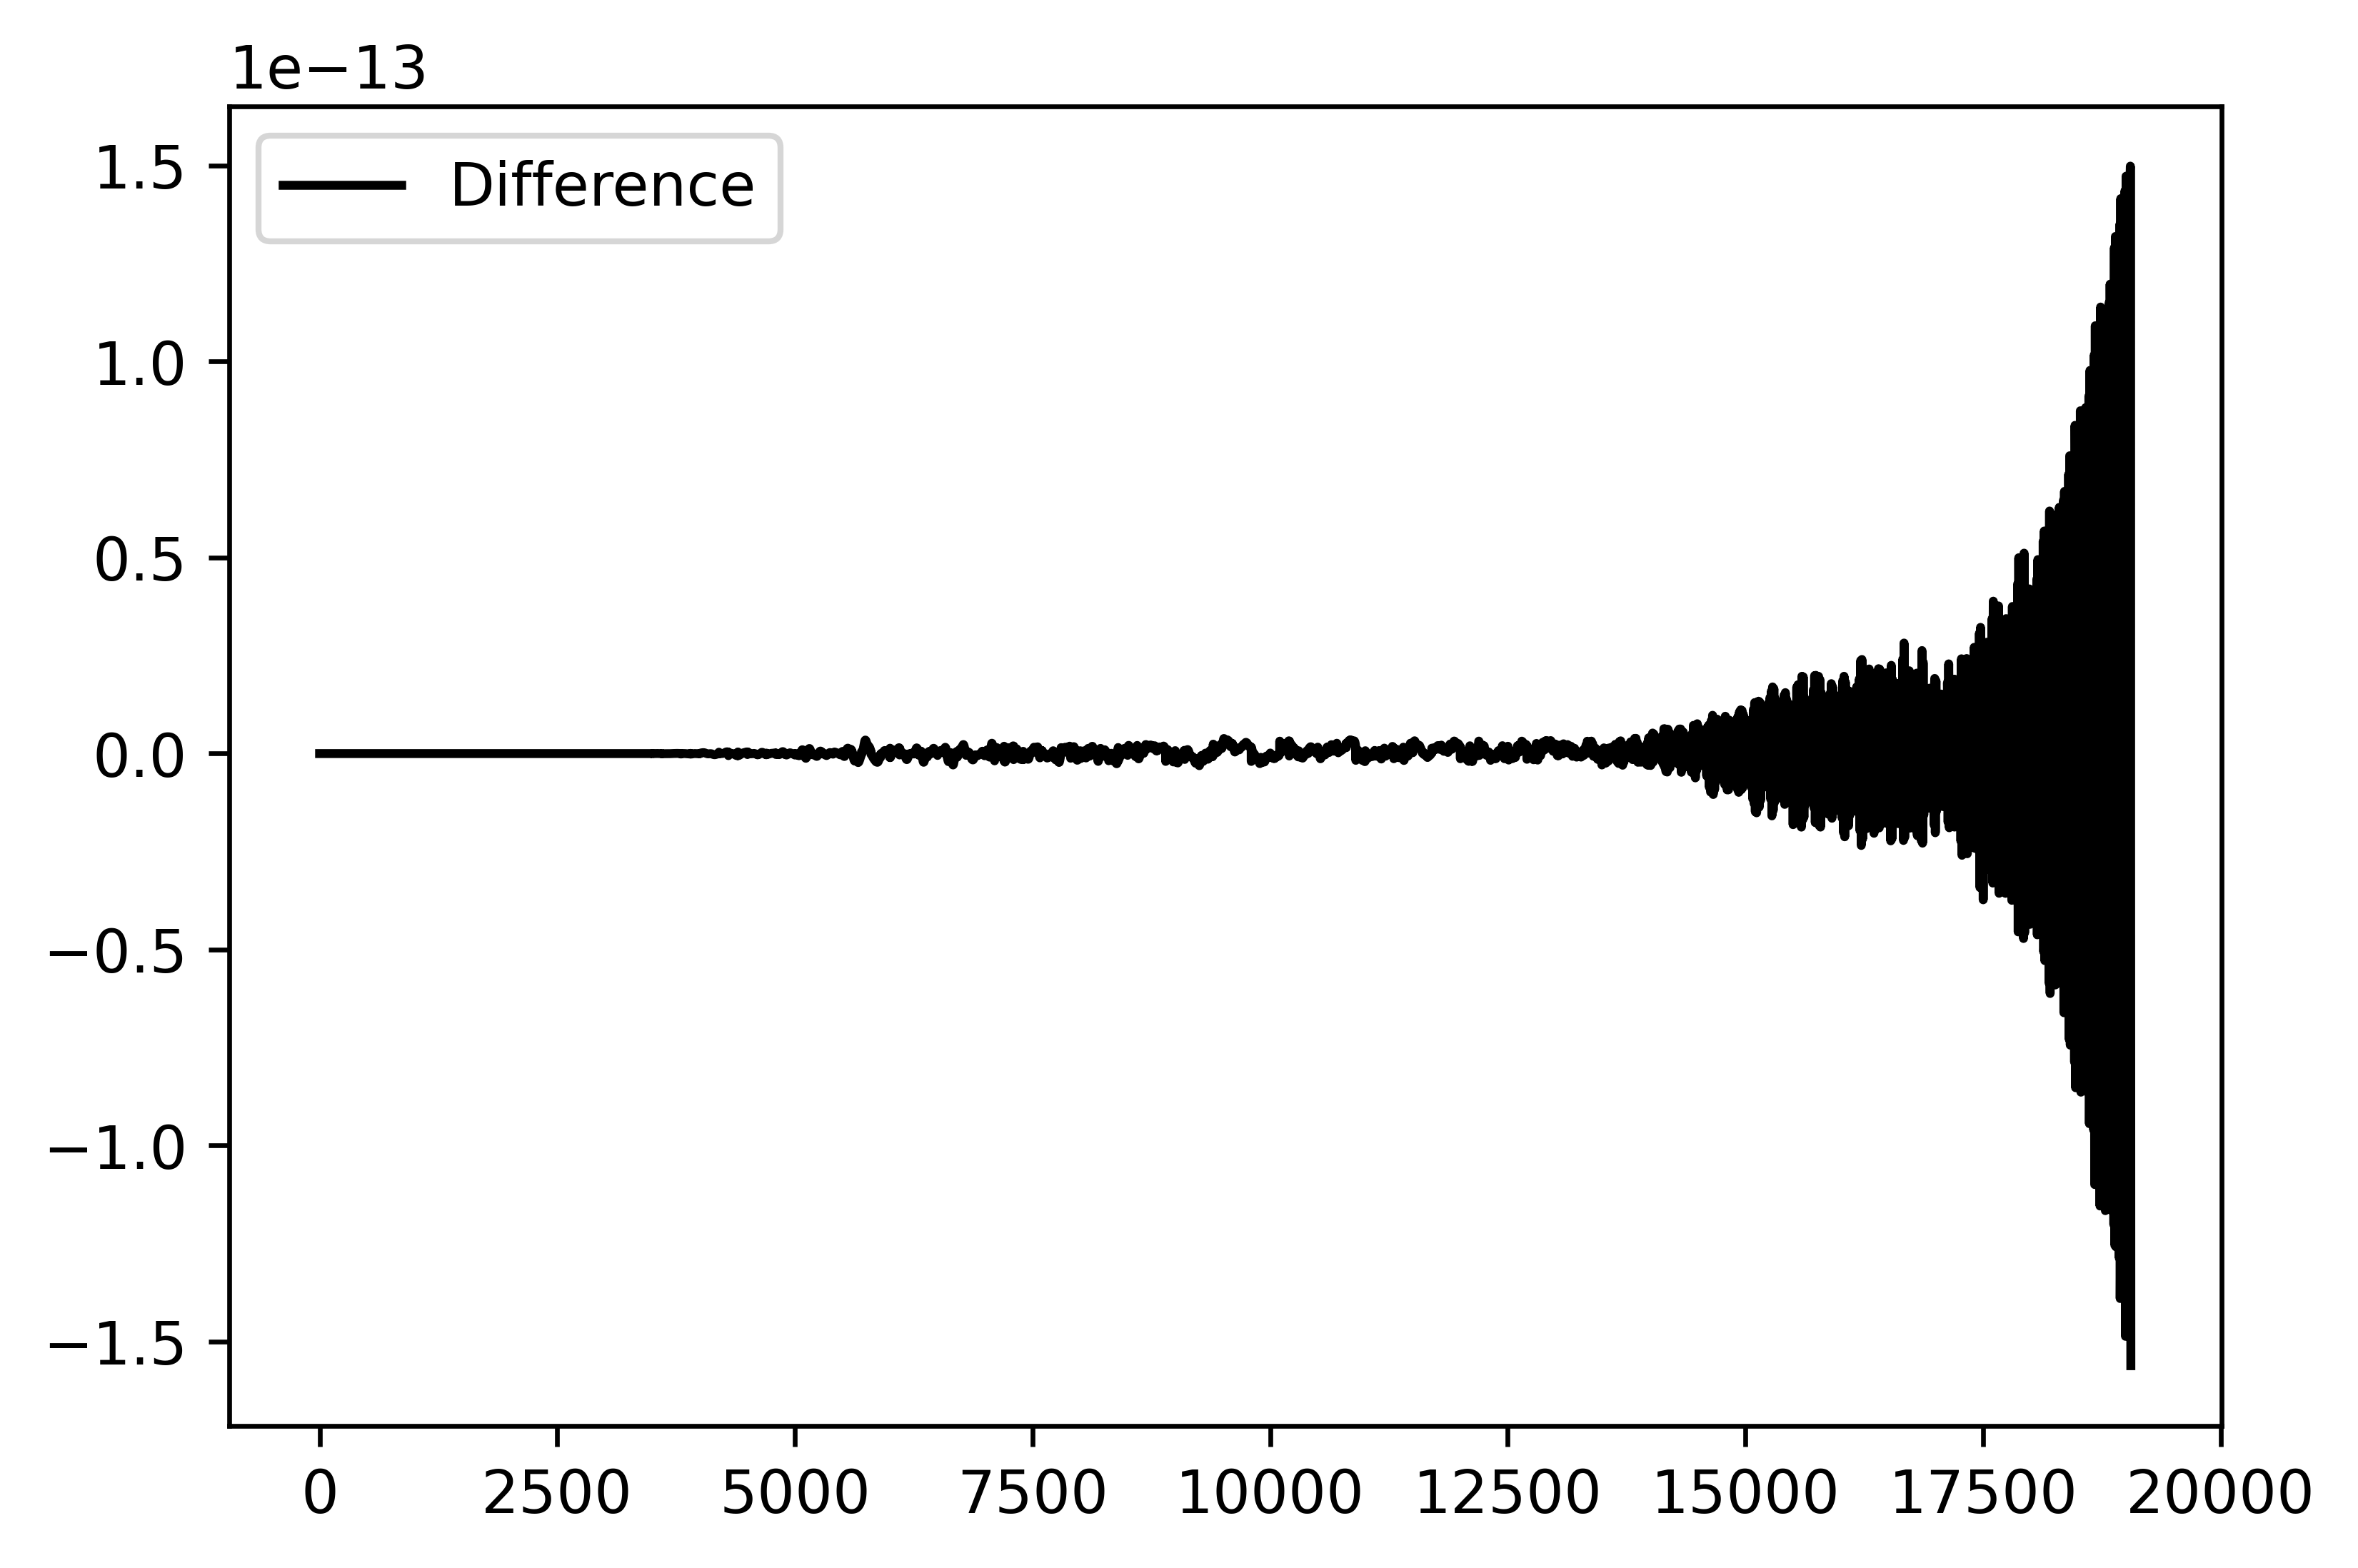

In [52]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Data[CS,row,:],label='Right')
#plt.plot(Data[CE,row,:],label='Left')
plt.plot(Data[CS,row,:]-Data[CE,row,:], label='Difference')
plt.legend()
plt.show()

In [75]:
sr = 15
SampledS = np.zeros((int(len(Data[CS,row,:])/sr)))
SampledE = np.zeros((int(len(Data[CS,row,:])/sr)))
SampledD = np.zeros((int(len(Data[CS,row,:])/sr)))
for i in range(len(SampledS)):
    SampledS[i]=np.average(Data[CS,row,i*sr:i*sr+sr])
    SampledE[i]=np.average(Data[CE,row,i*sr:i*sr+sr])
    SampledD[i]=np.average(Data[CS,row,i*sr:i*sr+sr]-Data[CE,row,i*sr:i*sr+sr])
SampledS = cf.Smoothing(SampledS,3,dets_to_remove=4)
SampledE = cf.Smoothing(SampledE,3,dets_to_remove=4)
SampledR = SampledD
SampledD = SampledS - SampledE


In [54]:
SampledS.shape

(1270,)

## FingerPrinting

In [60]:
Wvlt = 'db3'
NumScales=50
start = 0
end = 13605
ss = 1

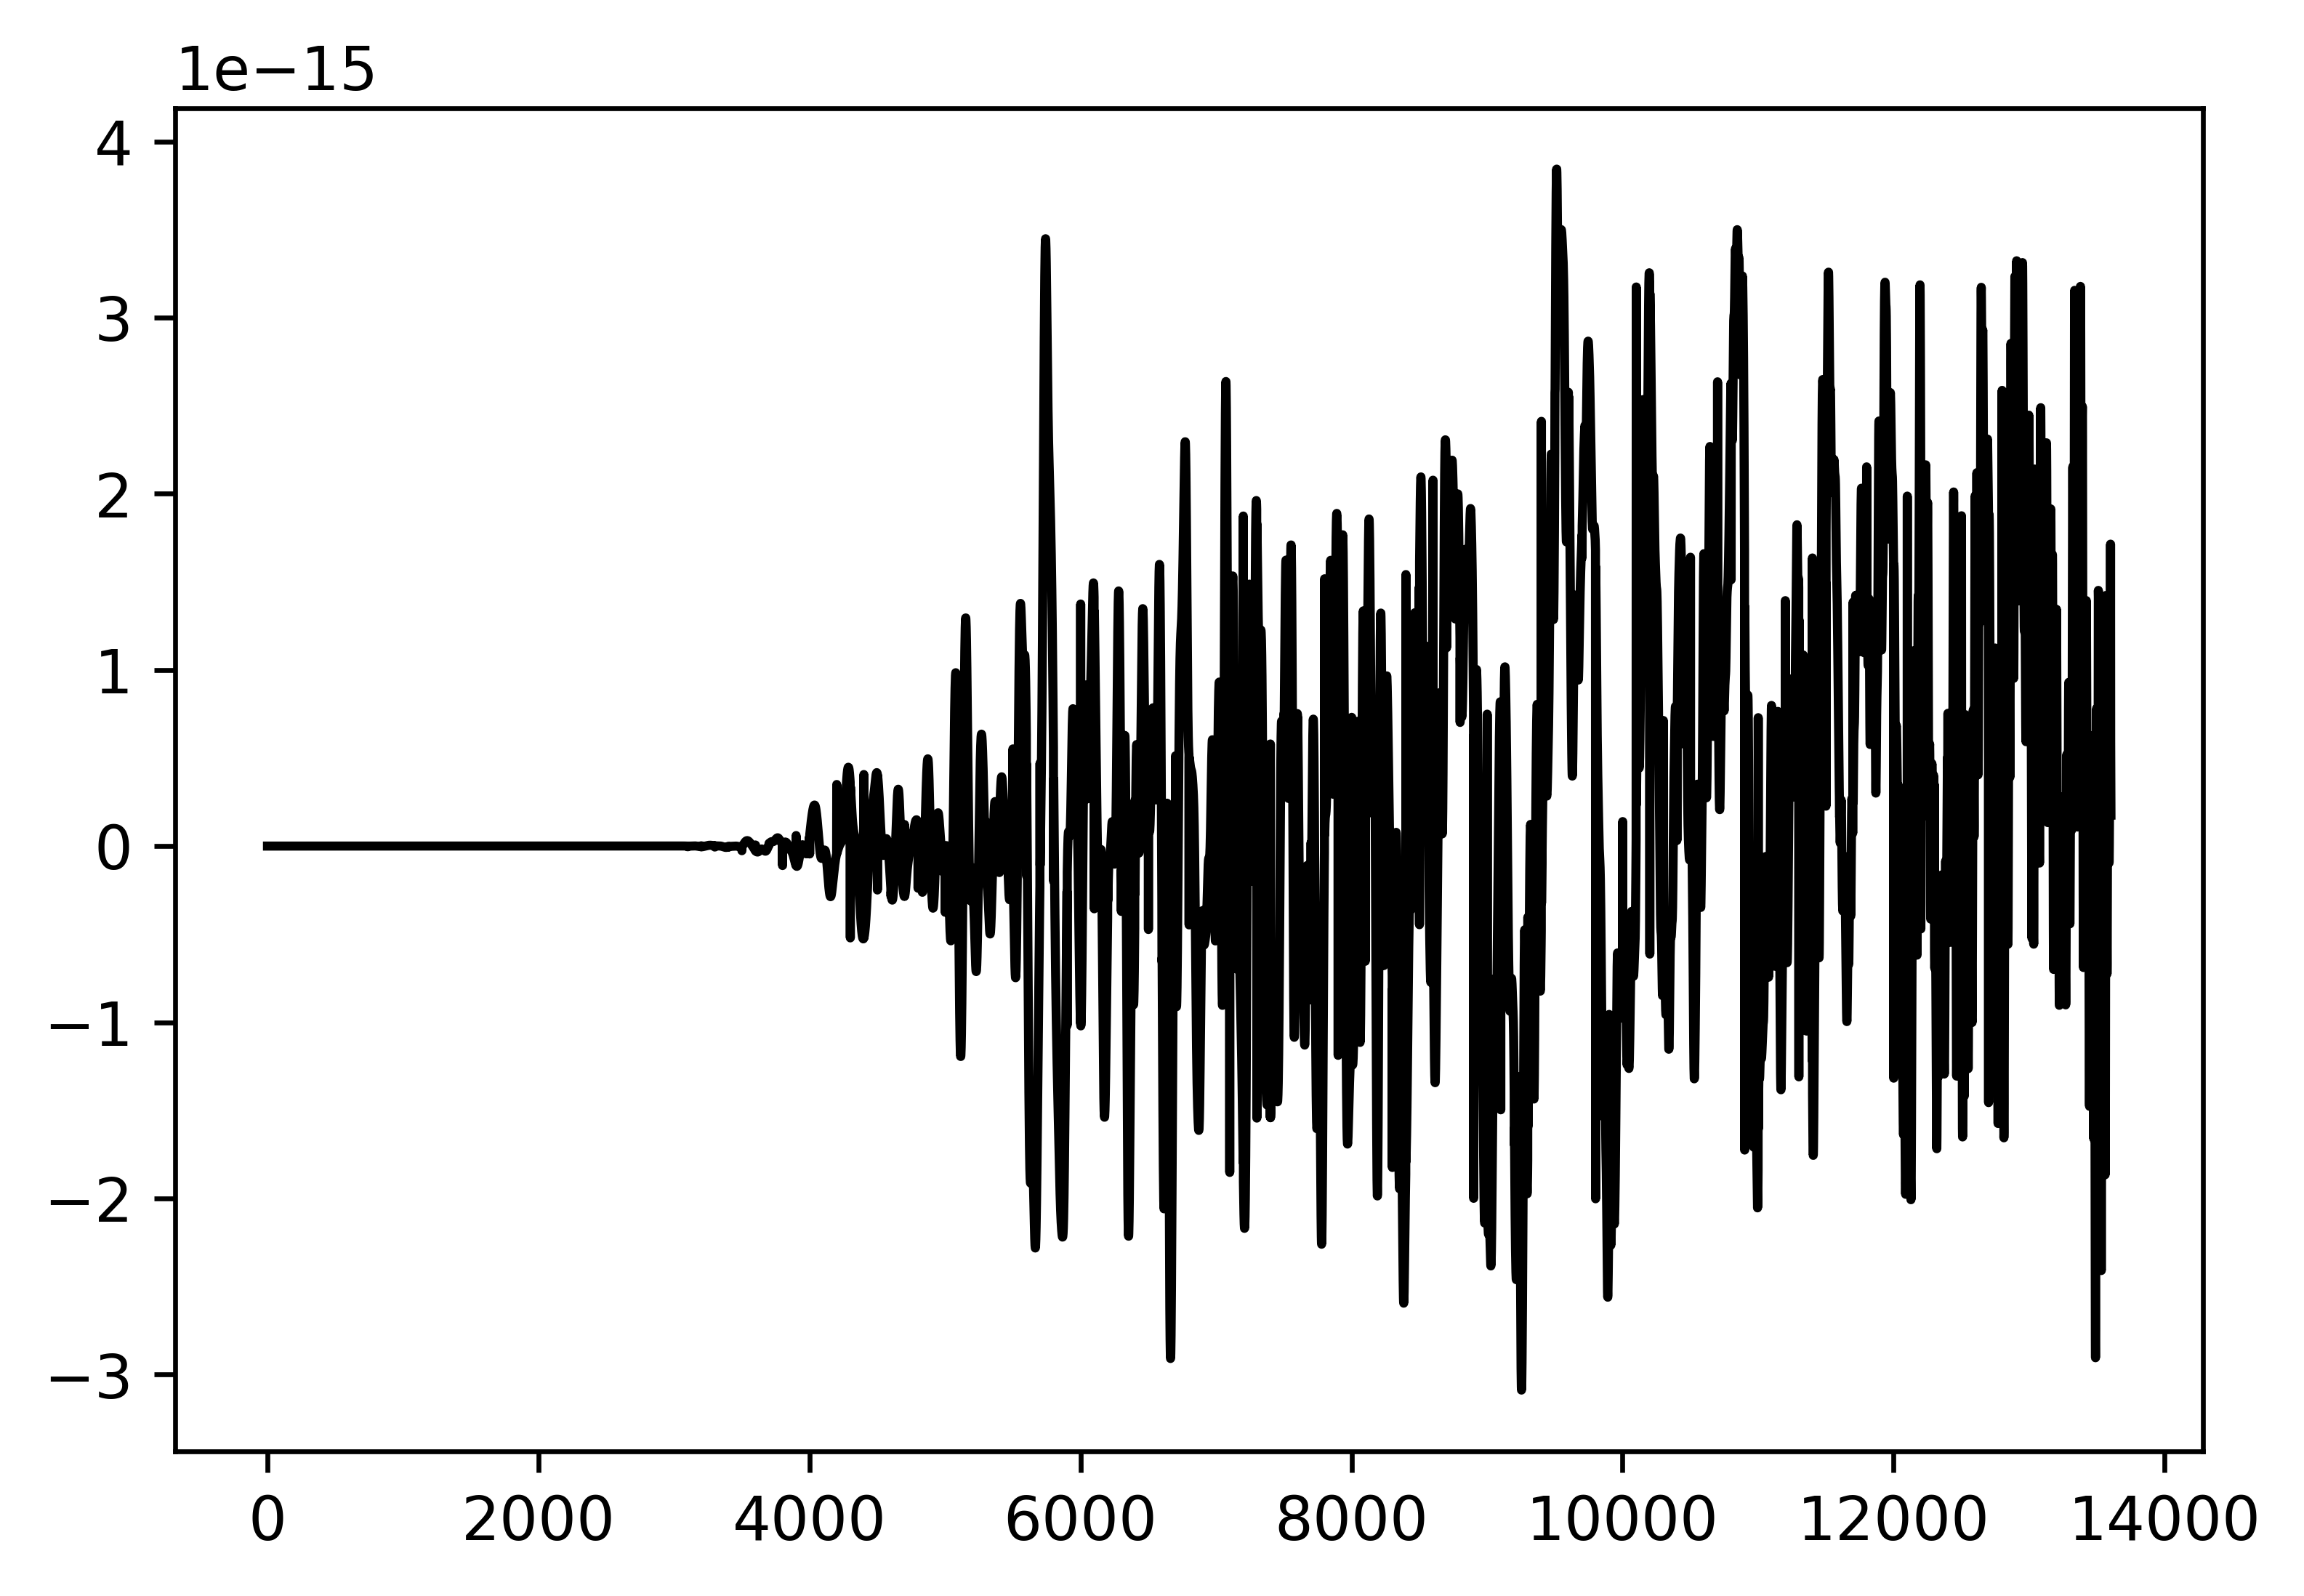

In [62]:
fig = plt.figure(figsize=(6,4),dpi=600)
#plt.plot(Temp)
#plt.plot(Data[CE,row,:15000],label='Left')
plt.plot(Data[CS,row,start:end]-Data[CE,row,start:end], label='Difference')
#plt.plot(cf.Smoothing(Data[CS,row,start:end].T,3))
#plt.legend()
plt.show()

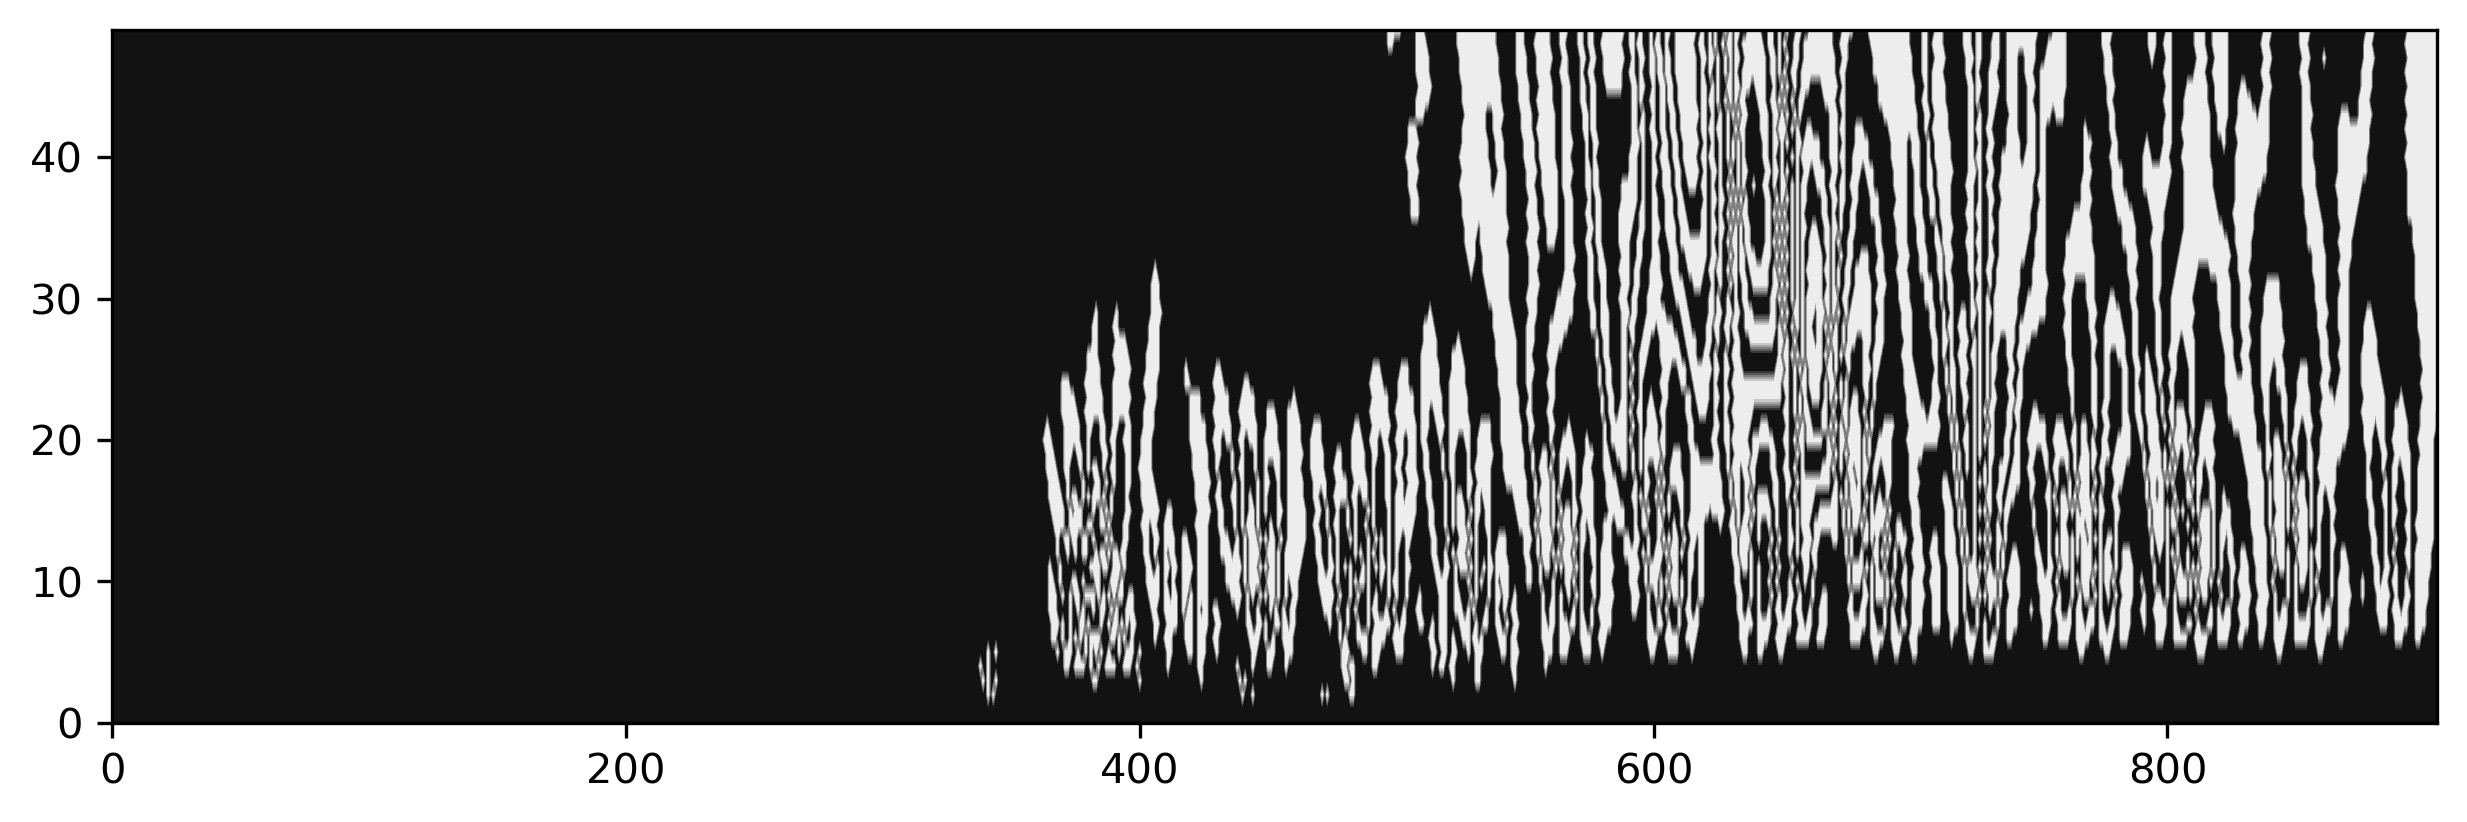

In [80]:
sampStart = int(len(SampledS)/len(Data[CS,row,:])*start)
sampEnd = int(len(SampledS)/len(Data[CS,row,:])*end)
TP1 = cf.getThumbprint2(SampledR[sampStart:sampEnd], wvt=Wvlt, ns=NumScales, scalespace = ss, numslices=6, slicethickness=0.12, 
                  valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TP1.T, cmap='gist_gray')
#plt.title('Test')
plt.show()


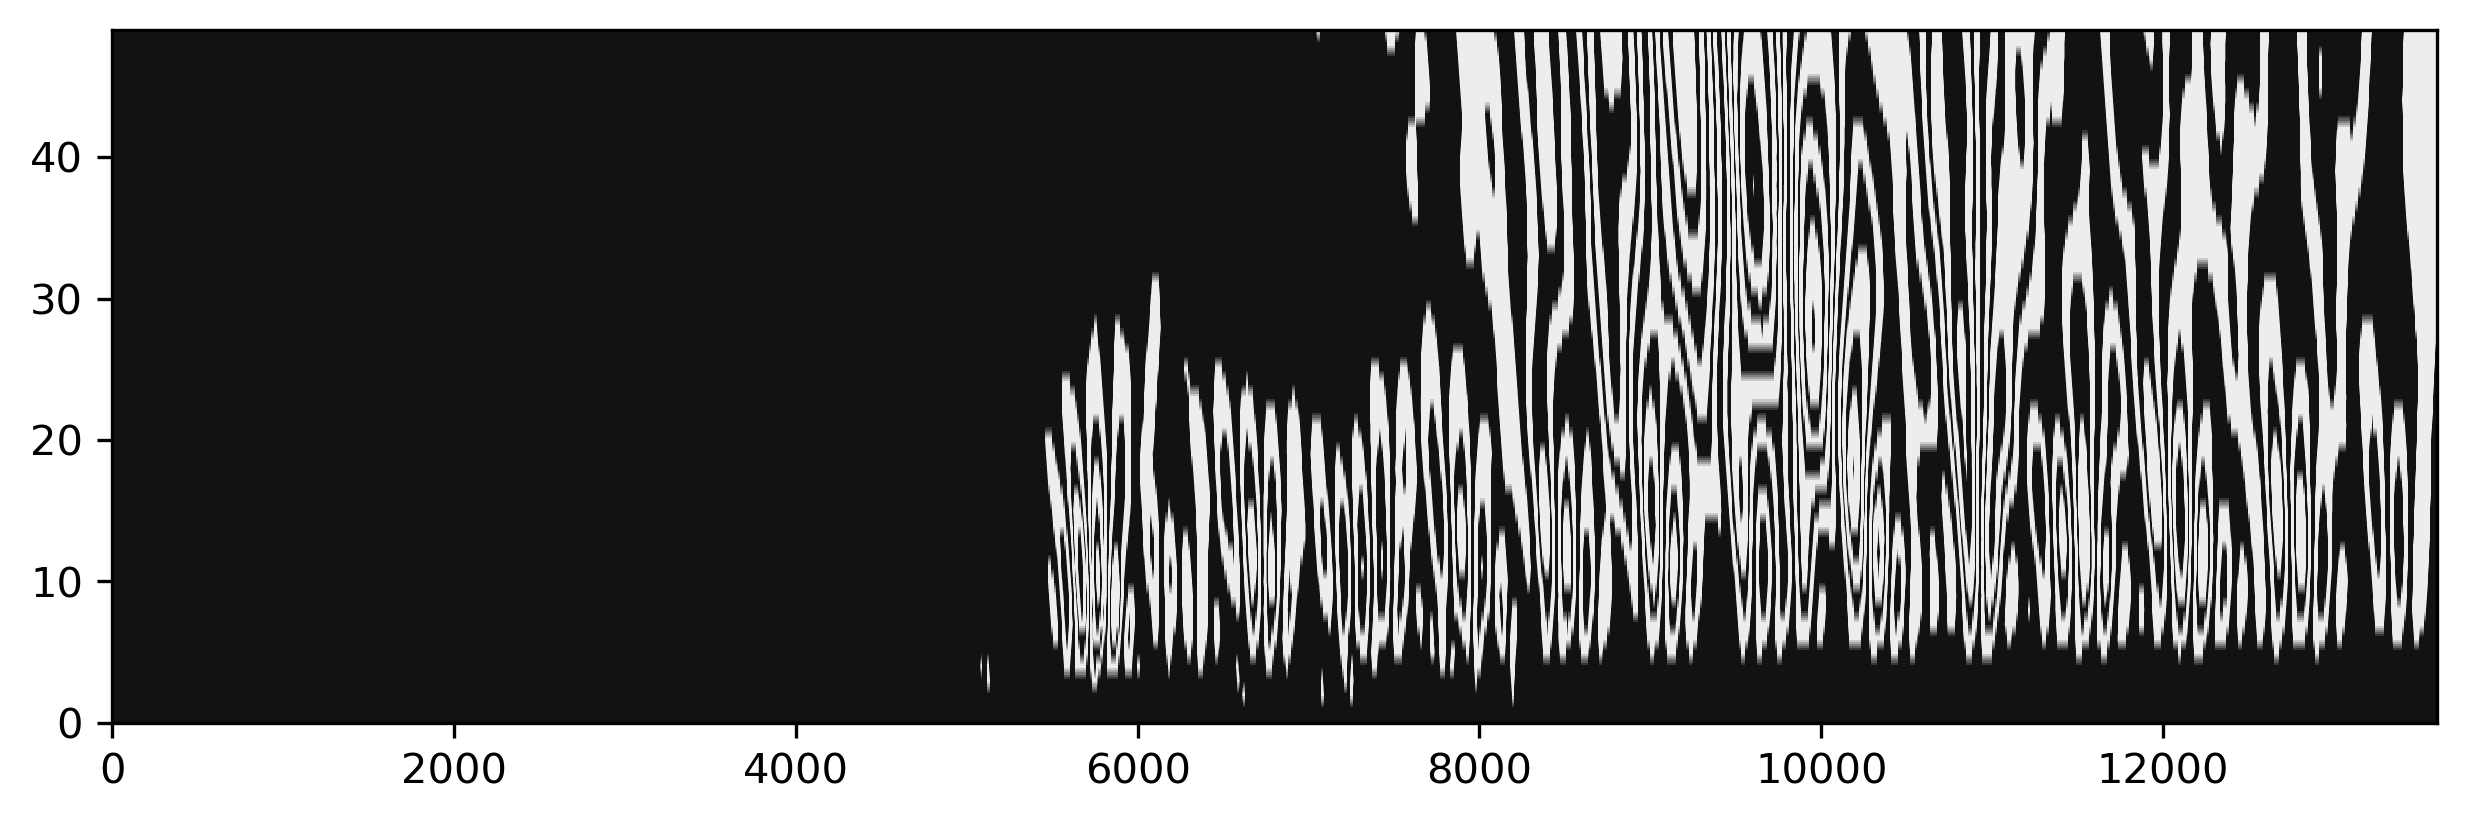

In [77]:
TPD = cf.getThumbprint2(spData, wvt=Wvlt, ns=NumScales, 
                        scalespace = sr, numslices=6, slicethickness=0.12, 
                        valleysorpeaks='both', normconstant=1, plot=True)
fig = plt.figure(figsize=(10,3), dpi=300)

plt.contourf(TPD.T, cmap='gist_gray')
#plt.title('Test')
plt.show()

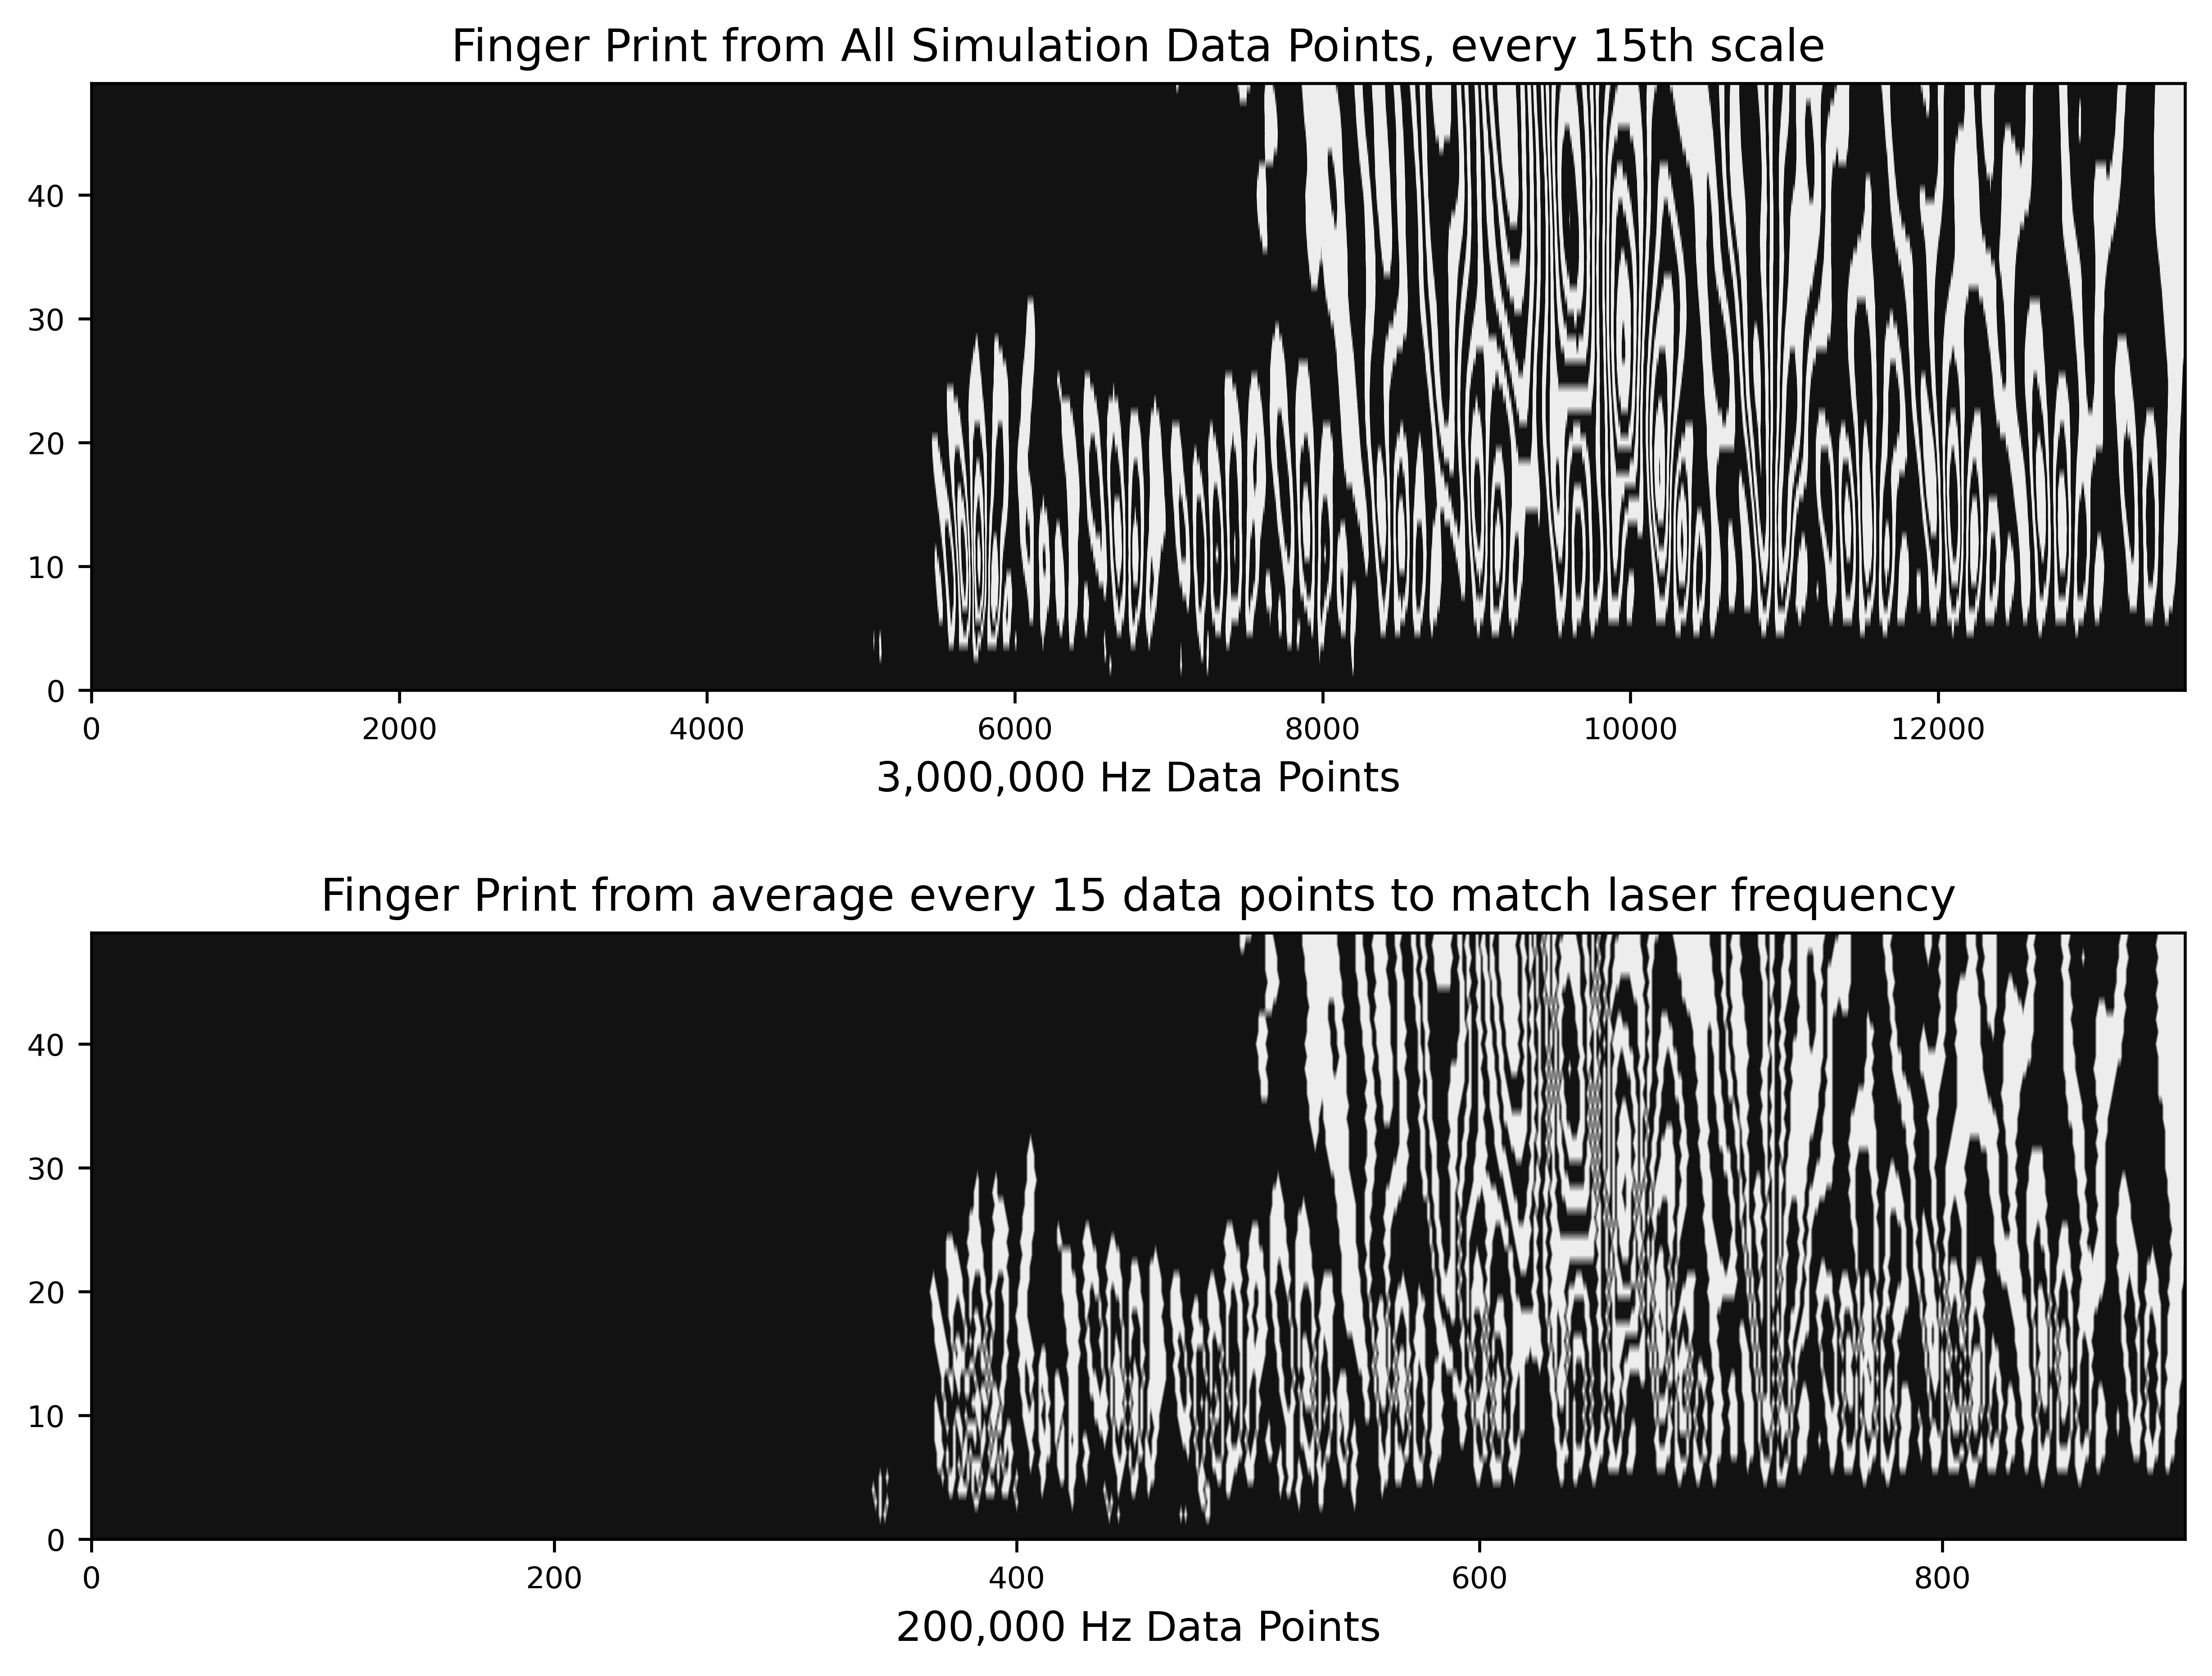

In [81]:
fig,axs = plt.subplots(2,figsize=(10,7), dpi=600)
plt.subplots_adjust(hspace=0.4)
axs[0].contourf(TPD.T, cmap='gist_gray')
axs[0].set_title('Finger Print from All Simulation Data Points, every 15th scale')
axs[0].set_xlabel('3,000,000 Hz Data Points',fontsize=11)
axs[0].tick_params(labelsize=8)
axs[1].contourf(TP1.T, cmap='gist_gray')
axs[1].set_title('Finger Print from average every 15 data points to match laser frequency')
axs[1].set_xlabel('200,000 Hz Data Points', fontsize=11)
axs[1].tick_params(labelsize=8)
plt.show()

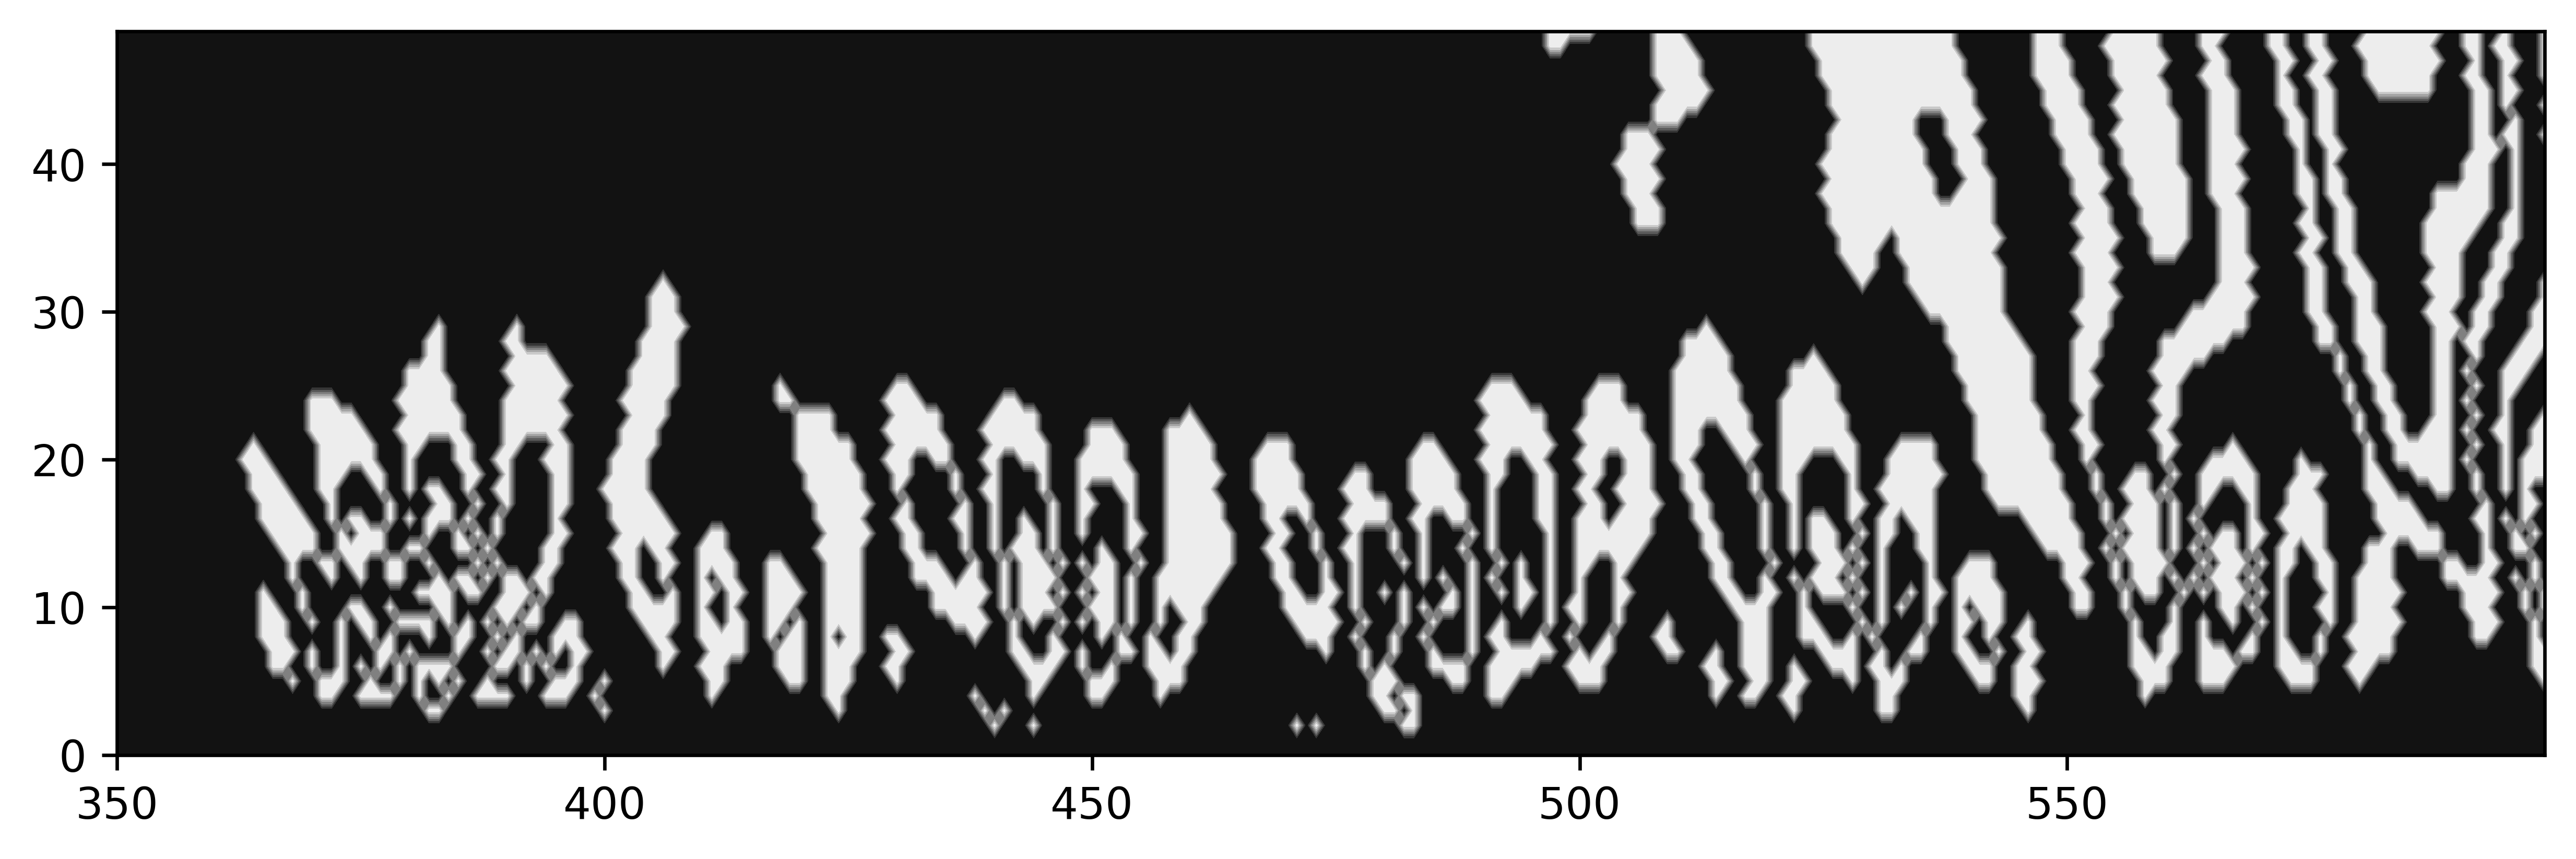

In [82]:
fig = plt.figure(figsize=(10,3), dpi=600)
X=np.arange(350,600)
Y=np.arange(0,50)
plt.contourf(X,Y,TP1[350:600].T, cmap='gist_gray')
#plt.title('Test')
plt.show()


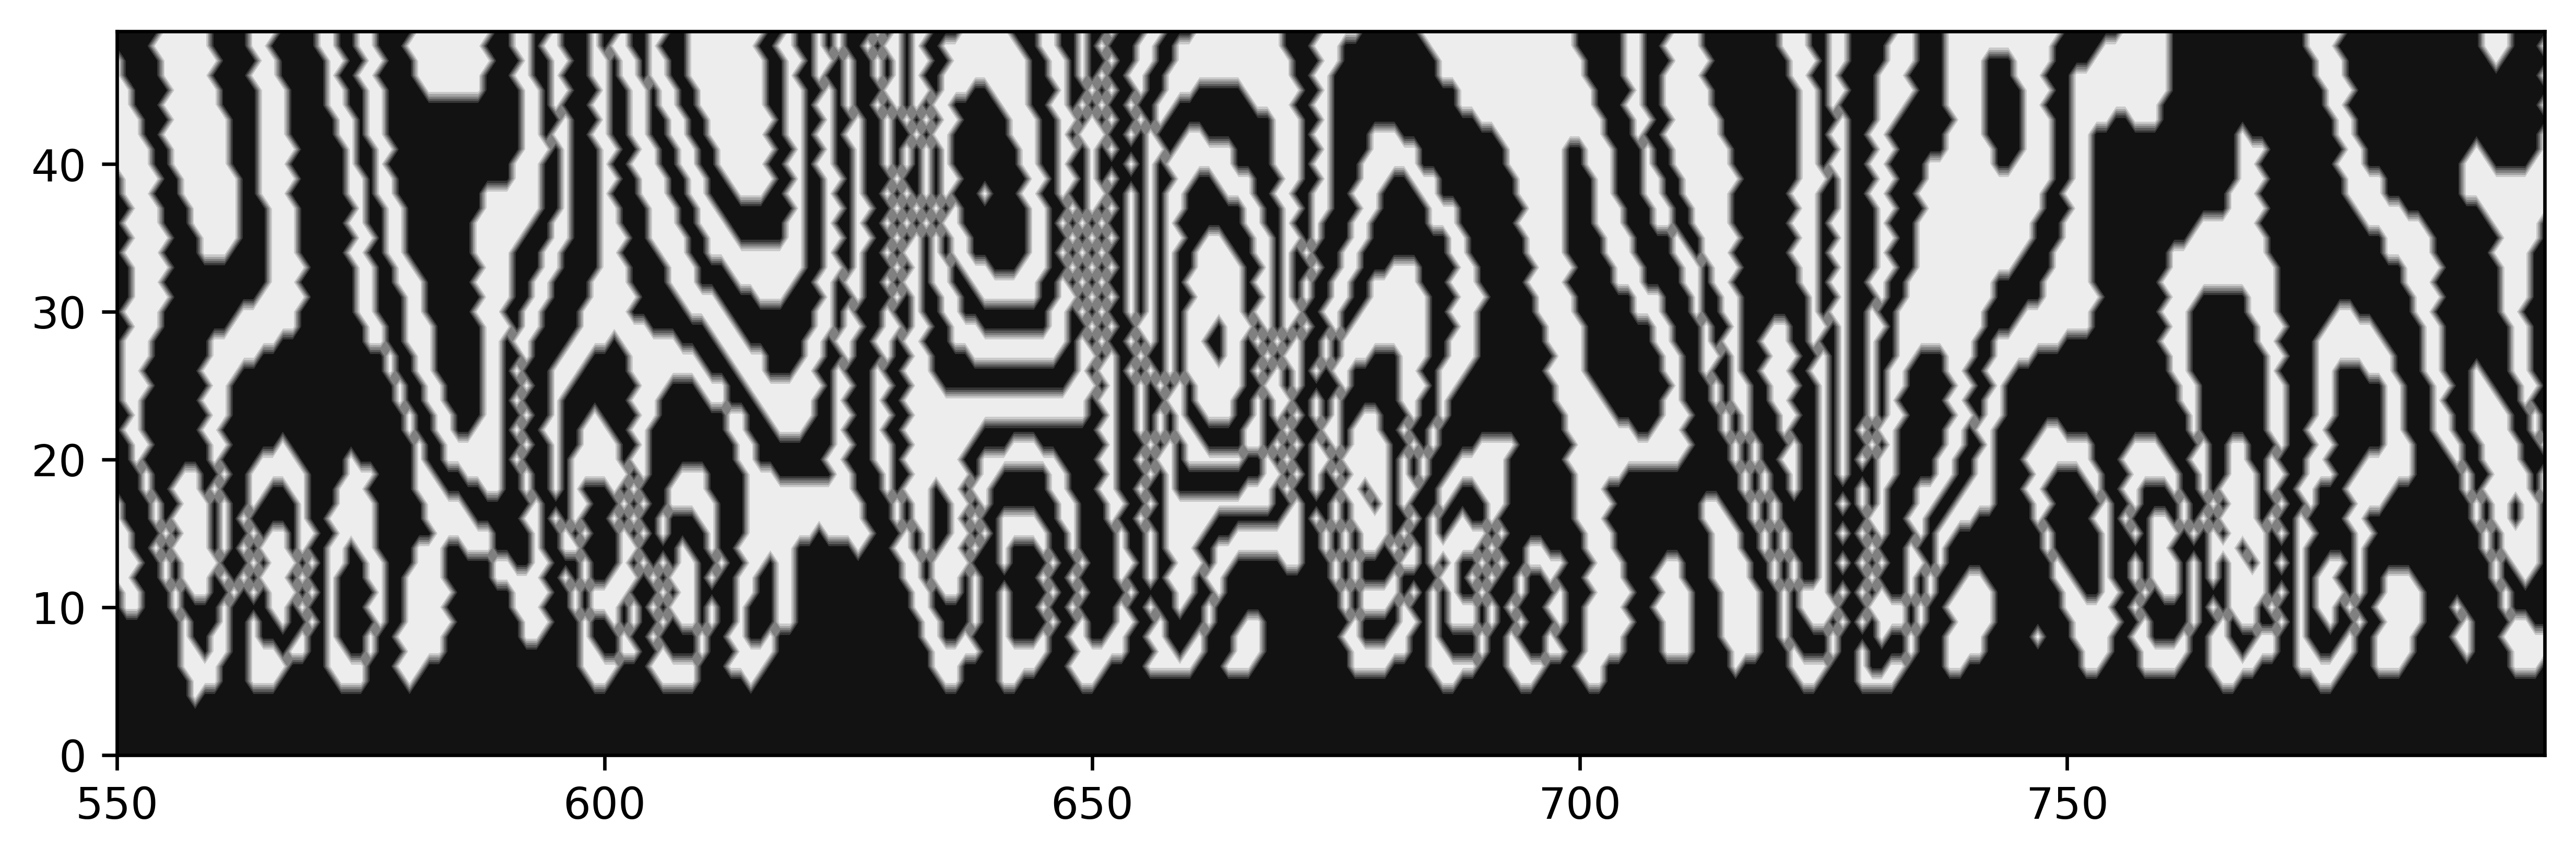

In [83]:
fig = plt.figure(figsize=(10,3), dpi=600)
X=np.arange(550,800)
Y=np.arange(0,50)
plt.contourf(X,Y,TP1[550:800].T, cmap='gist_gray')
#plt.title('Test')
plt.show()